<a href="https://colab.research.google.com/github/jpastor1649/MetNumUN2024II/blob/main/Lab2/jpastor_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U fortran-magic==0.8 ipython==7.34.0 numpy==1.25.2 setuptools==67.7.2

In [2]:
 %reload_ext fortranmagic

In [3]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [4]:
assert ran_the_first_cell, "Oh noes!"

In [5]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [6]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [7]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [8]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [9]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [10]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [11]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [12]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [13]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [14]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [15]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [16]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [17]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [18]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [19]:
4 * "a"

'aaaa'

In [20]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [21]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [22]:
%%time

matmul(a, b)

CPU times: user 46 µs, sys: 5 µs, total: 51 µs
Wall time: 57.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [23]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [24]:
def matmul2(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [25]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

matmul2(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [26]:
def matmul3(A,B):
    if len(A[0]) != len(B):
        raise IndexError("Incompatible Matrix ")
    else:
        rows_out = len(A)
        cols_out = len(B[0])
        out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [27]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

matmul3(a,b)

IndexError: Incompatible Matrix 

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [6, 7, 8, 9]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [0, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [6, 7, 8, 0],]

result = matmul3(a,b)
result

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [30]:
import time,random
def random_matrix(rows, cols):
    out = []
    for row in range(rows):
        out.append([random.random() for _ in range(cols)])
    return out
def average_time_python():
    times = 0
    for i in range(0, 10):
        randa = random_matrix(600, 100)
        randb = random_matrix(100, 600)
        start_time = time.time()
        result = matmul(randa, randb)
        end_time = time.time()
        times +=(end_time - start_time)

    average_time = times/ 10
    print(f"Average execution time with Python: {average_time:.3f} seconds")
    return average_time

python_time = average_time_python()


Average execution time with Python: 9.611 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [31]:
#https://www.w3schools.com/python/pandas/pandas_dataframes.asp
language_benchmark = pd.DataFrame({
       'Language': ['Python'],
       'Average time(s)': [python_time]
   })
language_benchmark

,Language,Average time(s)
0,Python,9.611001


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [32]:
#https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
import numpy as np, time

def average_time_numpy():
    times = 0
    for i in range(10):
        randa = np.random.rand(600, 100)
        randb = np.random.rand(100, 600)
        start_time = time.time()
        result = np.matmul(randa, randb)
        end_time = time.time()
        times += (end_time - start_time)


    average_time = times / 10
    print(f"Average execution time with NumPy: {average_time:.3f} seconds")
    return average_time

numpy_time = average_time_numpy()

#add new row to dataframe
new_row = pd.DataFrame({'Language': ['NumPy'], 'Average time(s)': [numpy_time]})
language_benchmark = pd.concat([language_benchmark, new_row], ignore_index=True)
language_benchmark

Average execution time with NumPy: 0.004 seconds


,Language,Average time(s)
0,Python,9.611001
1,NumPy,0.003624


In [33]:
%%time

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul3(randa, randb)

CPU times: user 9.96 s, sys: 92.7 ms, total: 10 s
Wall time: 10.1 s


In [34]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [35]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [36]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [37]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 10.8 ms


333328333350000.0

In [38]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 186 µs, sys: 2 µs, total: 188 µs
Wall time: 195 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [39]:
A = [[45, 67],
     [12, 64]]

B = [[12, 45],
     [23, 85]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [40]:
#https://stackoverflow.com/questions/15580572/fortran-matrix-multiplication-performance-in-different-optimization
%%fortran
subroutine matmul_2_2_fortran(A, B, res)
    real, intent(in)::A(2,2)
    real, intent(in)::B(2,2)
    real, intent(out)::res(2,2)
    do i=1,2
      do j=1,2
        do k=1,2
          res(i,j) = res(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do
end


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [41]:
%%time
matmul_2_2_fortran(A,B)

CPU times: user 34 µs, sys: 0 ns, total: 34 µs
Wall time: 37.9 µs


array([[2081., 7720.],
       [1616., 5980.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [42]:
#https://stackoverflow.com/questions/15580572/fortran-matrix-multiplication-performance-in-different-optimization
%%fortran
subroutine matmul_fortran(A, B, res)
    real, intent(in)::A(600,100)
    real, intent(in)::B(100,600)
    real, intent(out)::res(600,600)
    do i=1,600
      do j=1,600
        do k=1,100
          res(i,j) = res(i,j) + A(i,k) * B(k,j)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [43]:
randa = np.array(random_matrix(600, 100))
randb = np.array(random_matrix(100, 600))
matmul_fortran(randa,randb)

array([[28.728107, 25.401567, 27.060995, ..., 25.532827, 29.121132,
        27.90966 ],
       [25.689995, 22.90571 , 22.740082, ..., 22.810059, 26.641506,
        24.454096],
       [29.162464, 28.066881, 26.824594, ..., 25.365181, 29.621265,
        28.229374],
       ...,
       [26.314962, 24.464367, 25.39353 , ..., 23.510406, 26.61613 ,
        25.086102],
       [28.49261 , 28.191786, 28.998753, ..., 24.451475, 31.314535,
        29.370201],
       [24.695642, 23.165865, 22.931114, ..., 23.799026, 26.309359,
        23.537592]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [44]:
import time

def average_time_fortran():
    times=0
    for i in range(10):
        randa = np.array(random_matrix(600, 100))
        randb = np.array(random_matrix(100, 600))
        start_time = time.time()
        result = matmul_fortran(randa, randb)
        end_time = time.time()
        times += (end_time - start_time)

    average_time = times / 10
    print(f"Average execution time with FortranMagic: {average_time:.3f} seconds")
    return average_time


fortranTime = average_time_fortran()
new_row = pd.DataFrame({'Language': ['FortranMagic'], 'Average time(s)': [fortranTime]})
language_benchmark = pd.concat([language_benchmark, new_row], ignore_index=True)
language_benchmark

Average execution time with FortranMagic: 0.049 seconds


,Language,Average time(s)
0,Python,9.611001
1,NumPy,0.003624
2,FortranMagic,0.048890


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [45]:
#https://www.tutorialspoint.com/fortran/vector_and_matrix_multiplication.htm
%%writefile matmulf.f90

program matmulf

  integer :: i,j
  integer, dimension(600, 100) :: A
  integer, dimension(100, 600) :: B
  integer, dimension(100, 100) :: C

  do i = 1, 600
    do j = 1, 100
        A(i, j) = i+j
    end do
  end do

  do i = 1, 100
    do j = 1, 600
        B(i, j) = i*j
    end do
  end do

  call cpu_time(t1)
  do i = 1, 10**4
    C = matmul(B, A)
  end do
  call cpu_time(t2)

  avg_t=(t2-t1)/(10**4)

  write (*,*) "average execution time :",avg_t , "seconds"

  open(unit=1,file="fortran_benchmark.txt",status='replace')
  write(1,*) avg_t
  close(1)
  stop
end program matmulf

Writing matmulf.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [46]:
!gfortran -o matmulf matmulf.f90
!./matmulf

 average execution time :   8.01609131E-04 seconds


**My own example 18 - Adding Fortran average execution time to the data frame**

In [47]:
with open('fortran_benchmark.txt') as f:
    avg_t = float(f.read().strip())
print('Fortran average time:', avg_t)

new_row = pd.DataFrame({'Language': ['Fortran'], 'Average time(s)': [avg_t]})
language_benchmark = pd.concat([language_benchmark, new_row], ignore_index=True)
language_benchmark

Fortran average time: 0.000801609131


,Language,Average time(s)
0,Python,9.611001
1,NumPy,0.003624
2,FortranMagic,0.048890
3,Fortran,0.000802


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [48]:
#https://www.geeksforgeeks.org/c-matrix-multiplication/
%%writefile matmulc.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define RA 600
#define RB 100
#define CA 100
#define CB 600

int main() {
    double A[RA][CA], B[RB][CB], C[RA][CB];
    int i, j, k, count;
    clock_t start, end;
    double cput, time = 0;

    if (CA != RB) {
        printf("Incompatible Matrix.\n");
        return 1;
    }

    for (i = 0; i < RA; i++) {
        for (j = 0; j < CA; j++) {
            A[i][j] = rand() % 10;
        }
    }
    for (i = 0; i < RB; i++) {
        for (j = 0; j < CB; j++) {
            B[i][j] = rand() % 10;
        }
    }

    for (count = 0; count < 10; count++) {
        start = clock();
        for (i = 0; i < RA; i++) {
            for (j = 0; j < CB; j++) {
                C[i][j] = 0;
                for (k = 0; k < CA; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        end = clock();
        cput = ((double) (end - start)) / CLOCKS_PER_SEC;
        time += cput;
    }

    double average_time = time / 10;
    printf("Average execution time: %f seconds\n", average_time);
    FILE *file = fopen("c_benchmark.txt", "w");
    fprintf(file, "%f\n", average_time);
    fclose(file);
    return 0;
}

Writing matmulc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [49]:
!gcc matmulc.c -o matmulc
!./matmulc

Average execution time: 0.175442 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [50]:
with open('c_benchmark.txt') as f:
    average_timec = float(f.read().strip())

new_row = pd.DataFrame({'Language': ['C'], 'Average time(s)': [average_timec]})
language_benchmark = pd.concat([language_benchmark, new_row], ignore_index=True)
language_benchmark

,Language,Average time(s)
0,Python,9.611001
1,NumPy,0.003624
2,FortranMagic,0.048890
3,Fortran,0.000802
4,C,0.175442


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [51]:
!apt-get update && apt-get install -y g++

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,612 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,452 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,275 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ub

In [52]:
#https://www.geeksforgeeks.org/cpp-matrix-multiplication/
%%writefile matmulc++.cpp
#include <iostream>
#include <chrono>
#include <fstream>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

using namespace std;
using namespace std::chrono;

int main() {
    int *A = new int[ROWS_A * COLS_A];
    int *B = new int[ROWS_B * COLS_B];
    int *result = new int[ROWS_A * COLS_B];
    int i, j, k;
    double total_time = 0;

    if(COLS_A != ROWS_B) {
        cout << "Incompatible Matrix" << endl;
        return 1;}

    // Initialize matrices A and B
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i * COLS_A + j] = i * j;
        }
    }

    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i * COLS_B + j] = i + j;
        }
    }

    // Multiply ten times and measure the execution time
    for (int t = 0; t < 10; t++) {
        auto start_time = high_resolution_clock::now();

        #pragma omp parallel for private(j, k)
        for (i = 0; i < ROWS_A; i++) {
            for (j = 0; j < COLS_B; j++) {
                int sum = 0;
                for (k = 0; k < COLS_A; k++) {
                    sum += A[i * COLS_A + k] * B[k * COLS_B + j];
                }
                result[i * COLS_B + j] = sum;
            }
        }

        auto end_time = high_resolution_clock::now();
        auto duration = duration_cast<microseconds>(end_time - start_time).count();
        total_time += duration;
    }


    double average_timecpp = total_time / 10 / 1000000;
    printf("Average execution time: %f seconds\n", average_timecpp);
    FILE *file = fopen("c++_benchmark.txt", "w");
    fprintf(file, "%f\n", average_timecpp);
    fclose(file);
    return 0;
}

Writing matmulc++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [53]:
!g++ -o matmulc++ matmulc++.cpp
!./matmulc++

Average execution time: 0.128312 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [54]:
with open('c++_benchmark.txt') as f:
    average_timecpp = float(f.read().strip())

new_row = pd.DataFrame({'Language': ['C++'], 'Average time(s)': [average_timecpp]})
language_benchmark = pd.concat([language_benchmark, new_row], ignore_index=True)
language_benchmark

,Language,Average time(s)
0,Python,9.611001
1,NumPy,0.003624
2,FortranMagic,0.048890
3,Fortran,0.000802
4,C,0.175442
5,C++,0.128312


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [55]:
#https://www.javatpoint.com/java-program-to-multiply-two-matrices
%%writefile MatMulj.java

  import java.util.Random;
  import java.io.FileWriter;
  import java.io.IOException;

  class MatMulj {

    public static void main(String[] args){

      //matrix multiplication repetitions
      double averageTime = averageTime();

      //write average into a file
      try {
          FileWriter fileAvr = new FileWriter("java_benchmark.txt");
          fileAvr.write(Double.toString(averageTime));
          fileAvr.close();
      }
      catch (IOException e) {
          e.printStackTrace();
      }}



    public static double averageTime() {
        double times = 0;
        for (int i = 0; i < 10; i++) {
            double[][] randa = randomMatrix(600, 100);
            double[][] randb = randomMatrix(100, 600);
            long startTime = System.nanoTime();
            double[][] result = matmul(randa, randb);
            long endTime = System.nanoTime();
            times += (endTime - startTime) / 1000000000.0;
        }
        double averageTime = times / 10;
        System.out.println("Average execution time with Java: "+ averageTime +" seconds");
        return averageTime;

    }

    public static double[][] matmul(double[][] A, double[][] B) {
        if (A[0].length != B.length) {
            System.err.println("Incompatible matrix");
            return null;
        } else {
            double result[][] = new double[A.length][B[0].length];
            for (int i = 0; i < A.length; i++) {
                for (int j = 0; j < B[0].length; j++) {
                    for (int k = 0; k < A[0].length; k++)
                        result[i][j] += A[i][k] * B[k][j];
                }
            }
            return result;
        }
    }

    public static double[][] randomMatrix(int rows, int cols) {
        double[][] matrix = new double[rows][cols];
        Random random = new Random();

        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = random.nextInt(100);
            }
        }
        return matrix;
    }
}

Writing MatMulj.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:
!javac MatMulj.java
!java MatMulj

Average execution time with Java: 0.09294431630000001 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [57]:
with open('java_benchmark.txt') as f:
    avg_timej = float(f.read().strip())

new_row = pd.DataFrame({'Language': ['Java'], 'Average time(s)': [avg_timej]})
language_benchmark = pd.concat([language_benchmark, new_row], ignore_index=True)
language_benchmark

,Language,Average time(s)
0,Python,9.611001
1,NumPy,0.003624
2,FortranMagic,0.048890
3,Fortran,0.000802
4,C,0.175442
5,C++,0.128312
6,Java,0.092944


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [58]:
%%writefile matMuljs.js
const fs = require("fs");
function matMul(A, B) {
    if (A[0].length !== B.length) {
        console.error("Incompatible matrix");
        return null;
    }
    else {
        let result = Array(A.length).fill(0).map(() => Array(B[0].length).fill(0))

        for (let i = 0; i < A.length; i++) {
            for (let j = 0; j < B[0].length; j++) {
                for (let k = 0; k < A[0].length; k++) {
                    result[i][j] += A[i][k] * B[k][i];
                }

            }
        }
        return result;
    }
}

function randomMatrix(rows, cols) {
    let matrix = Array(rows).fill(0).map(() => Array(cols).fill(0))

    for (let i = 0; i < rows; i++) {
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.floor(Math.random() * 100);
        }
    }
    return matrix;
}

function averageTime() {
    let times = Array(10);
    for (let i = 0; i < times.length; i++) {
        let randa = randomMatrix(600, 100);
        let randb = randomMatrix(100, 600);
        let startTime = new Date().getTime();
        let result = matMul(randa, randb);
        let endTime = new Date().getTime();
        times[i] = (endTime - startTime) / 1000
    }
    let sum = 0;
    for (const i of times) {
        sum += i;
    }
    let averageTime = sum/times.length;
    console.log("Average execution time with Javascript: "+ averageTime +" seconds");
    return averageTime;
}

averageTimejs = averageTime();
fs.writeFile("js_benchmark.txt", `${averageTimejs}`, function(err) {
    if (err) {
        console.log("Error writing to file:", err);
    }
})



Writing matMuljs.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [59]:
!node matMuljs.js

Average execution time with Javascript: 0.43709999999999993 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [60]:
with open('js_benchmark.txt') as f:
    averageTimejs = float(f.read().strip())

new_row = pd.DataFrame({'Language': ['Javascript'], 'Average time(s)': [averageTimejs]})
language_benchmark = pd.concat([language_benchmark, new_row], ignore_index=True)
language_benchmark

,Language,Average time(s)
0,Python,9.611001
1,NumPy,0.003624
2,FortranMagic,0.048890
3,Fortran,0.000802
4,C,0.175442
5,C++,0.128312
6,Java,0.092944
7,Javascript,0.437100


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [61]:
min_time_Language = language_benchmark['Average time(s)'].min();
min_time_Language

0.000801609131

**My own example 32 - Adding the Speed factor columne to the data frame**

In [62]:
speed = []
for i in range(len(language_benchmark)):
  speed.append(language_benchmark['Average time(s)'].iloc[i]/min_time_Language)
language_benchmark['Speed Factor'] = speed

**My own example 33 - Sorting the the data frame by average execution time**

In [63]:
language_benchmark.sort_values(by=['Average time(s)'], inplace=True)
language_benchmark

,Language,Average time(s),Speed Factor
3,Fortran,0.000802,1.000000
1,NumPy,0.003624,4.521127
2,FortranMagic,0.048890,60.989907
6,Java,0.092944,115.947178
5,C++,0.128312,160.068037
4,C,0.175442,218.862277
7,Javascript,0.437100,545.278220
0,Python,9.611001,11989.634557


## Why is the Python Version so Much Slower?

In [64]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [65]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [66]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [67]:
data + data

array([2, 4, 6, 8])

In [68]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 380 µs, sys: 0 ns, total: 380 µs
Wall time: 389 µs


333328333350000.0

In [69]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 250 µs, sys: 3.96 ms, total: 4.21 ms
Wall time: 4.72 ms


333328333350000.0

In [70]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 202 µs, sys: 3 µs, total: 205 µs
Wall time: 213 µs


333328333350000.0

In [71]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [72]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [73]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [74]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [75]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [76]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [77]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [78]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [79]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [80]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [81]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [82]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [83]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [84]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [85]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [86]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [87]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [88]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [89]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [90]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [91]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [92]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [93]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [94]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [95]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [96]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [97]:
variance(np.random.standard_normal(1000))

1.0973828978173474

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [98]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [99]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [100]:
data.mean()

14.5

In [101]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [102]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [103]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [104]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [105]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [106]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [107]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [108]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [109]:
# ... or by label.
s.loc['a']

1

In [110]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [111]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [112]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [113]:
# As does boolean masking.
s.loc[s > 2]

,0
c,3
d,4
e,5


In [114]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [115]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [116]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [117]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

FileNotFoundError: [Errno 2] No such file or directory: 'AAPL.csv'

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!
#*Colombianos registrados en el exterior usando matplotlib, pandas*

In [132]:
#Leer la informacion y pasarla a un DataFrame, esperar que cargue correctamente el csv antes de ejecutar
migrantes = pd.read_csv('sample_data/Colombianos_registrados_en_el_exterior_20241109.csv')

df = pd.DataFrame(migrantes)
df.tail()

,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Ciudad de Nacimiento,Localización,Fecha de Registro,Cantidad de personas
528230,SUDAFRICA,ZAF,WESTERN CAPE/OUDTSHOORN,C. PRETORIA,ADULTO,42,CIENCIAS SOCIALES Y HUMANAS,"PERIODISMO, COMUNICACIÓN SOCIAL Y AFINES",NO INDICA,CASADO,FEMENINO,OTRO,-1,COLOMBIA/ANTIOQUIA/MEDELLIN,"(-30.559482, 22.937506)",2022-08,1
528231,SUDAFRICA,ZAF,WESTERN CAPE/PAARL,C. PRETORIA,ADULTO,36,NO INDICA,NO INDICA,NO INDICA,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,-1,COLOMBIA/VALLE DEL CAUCA/CALI,"(-30.559482, 22.937506)",2014-11,1
528232,SUDAFRICA,ZAF,WESTERN CAPE/SEA POINT,C. PRETORIA,ADULTO,45,CIENCIAS SOCIALES Y HUMANAS,CIENCIA POLÍTICA Y/O RELACIONES INTERNACIONALES,NO INDICA,SOLTERO,MASCULINO,NINGUNA,-1,COLOMBIA/NORTE DE SANTANDER/CUCUTA,"(-30.559482, 22.937506)",2016-07,1
528233,SUDAFRICA,ZAF,WESTERN CAPE/SOMERSET WEST,C. PRETORIA,ADULTO,58,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ADMINISTRACIÓN,PREGRADO - PROFESIONAL,CASADO,FEMENINO,NINGUNA,-1,COLOMBIA/ATLANTICO/BARRANQUILLA,"(-30.559482, 22.937506)",2023-11,1
528234,SUDAFRICA,ZAF,WESTERN CAPE/WELLINGTON,C. PRETORIA,ADULTO,46,CIENCIAS SOCIALES Y HUMANAS,"PERIODISMO, COMUNICACIÓN SOCIAL Y AFINES",NO INDICA,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/META/VILLAVICENCIO,"(-30.559482, 22.937506)",2018-06,1


In [133]:
migrantes.loc[:,["País","Cantidad de personas"]]

,País,Cantidad de personas
0,AUSTRALIA,1
1,AUSTRALIA,1
2,AUSTRALIA,1
3,AUSTRALIA,1
4,AUSTRALIA,1
...,...,...
528230,SUDAFRICA,1
528231,SUDAFRICA,1
528232,SUDAFRICA,1
528233,SUDAFRICA,1


In [134]:
# Crear tabla de cantidad de personas por país
country_counts = migrantes.groupby("País")["Cantidad de personas"].sum().sort_values(ascending=False)
country_counts_table = country_counts.reset_index()

country_counts_table.head()

,País,Cantidad de personas
0,ESTADOS UNIDOS,456216
1,CANADA,51157
2,AUSTRALIA,22314
3,SUDAFRICA,180


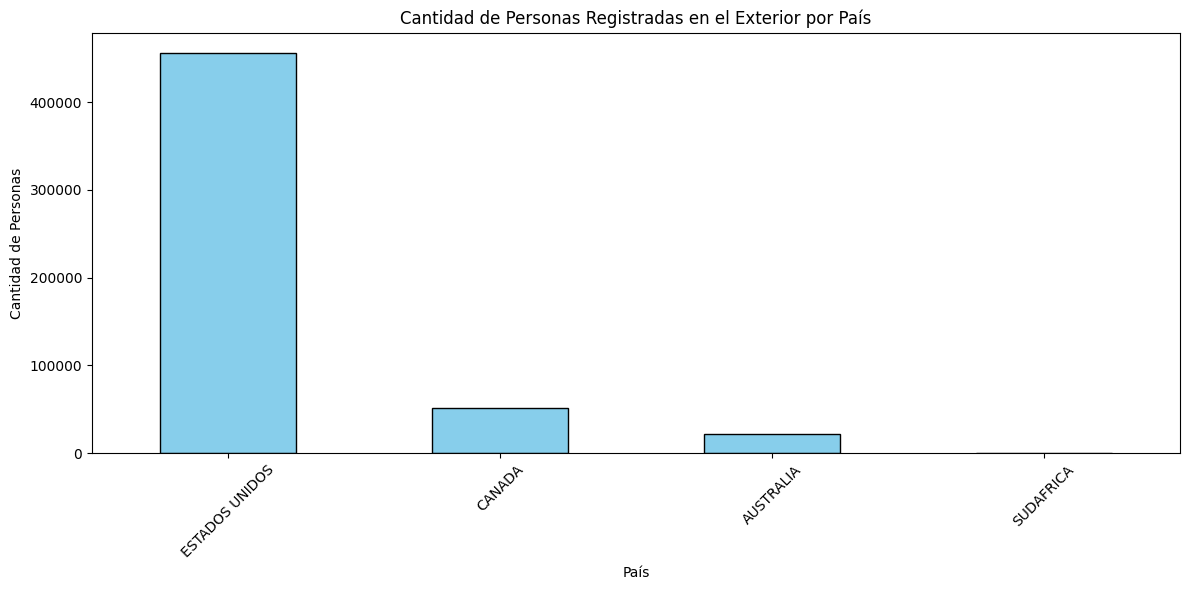

In [140]:
# Graficar la cantidad de personas por país
top_countries = country_counts.head()
plt.figure(figsize=(12, 6)) #alto y ancho
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Cantidad de Personas Registradas en el Exterior por País")
plt.xlabel("País")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [136]:
paises = df['Área Conocimiento'].value_counts()
tablaConocimiento = pd.DataFrame({'Cantidad de personas':paises})
tablaConocimiento = tablaConocimiento.reset_index().rename(columns = {'Área Conocimiento': 'Área Conocimiento'})
tablaConocimiento

,Área Conocimiento,Cantidad de personas
0,NINGUNA,243514
1,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",68483
2,NO INDICA,64948
3,"INGENIERÍA, ARQUITECTURA Y AFINES",51338
4,CIENCIAS SOCIALES Y HUMANAS,31218
5,CIENCIAS DE LA SALUD,29540
6,BELLAS ARTES,14428
7,CIENCIAS DE LA EDUCACIÓN,13463
8,MATEMÁTICAS Y CIENCIAS NATURALES,4789
9,"AGRONOMÍA, VETERINARIA Y AFINES",1809


<Figure size 1400x1000 with 0 Axes>

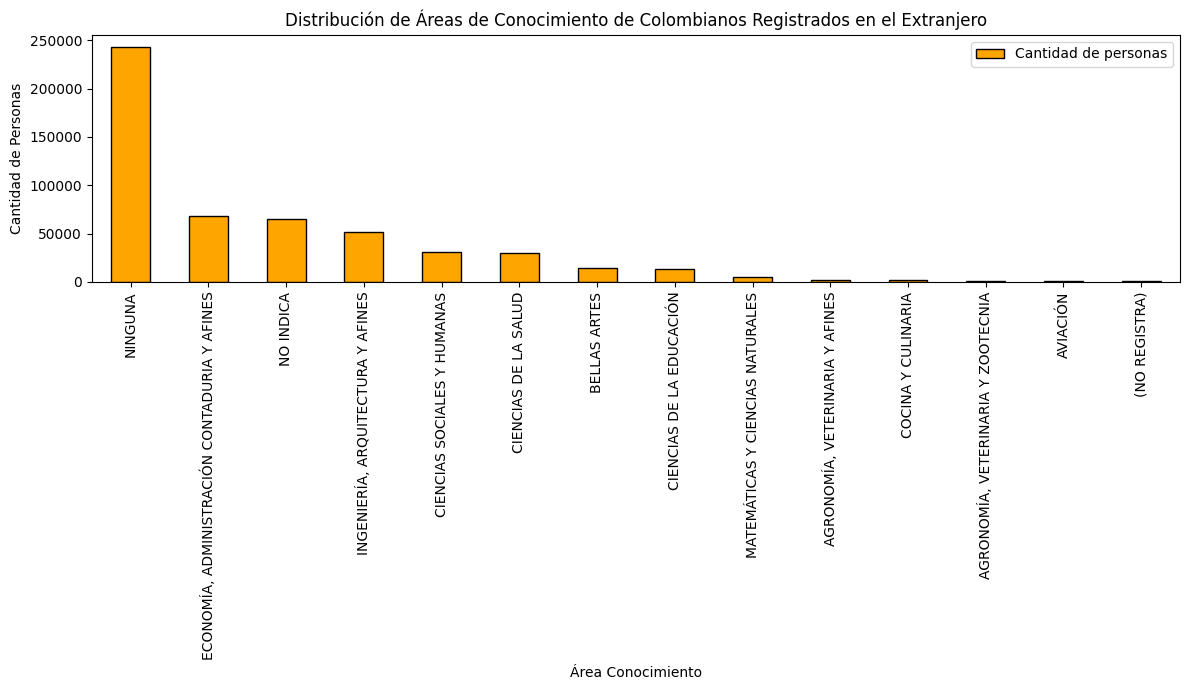

In [137]:
# Graficar la cantidad de personas por país
top_countries = tablaConocimiento.head(14).set_index("Área Conocimiento")
plt.figure(figsize=(14, 10))
top_countries.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Distribución de Áreas de Conocimiento de Colombianos Registrados en el Extranjero")
plt.xlabel("Área Conocimiento")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [138]:
paises = df['Grupo edad'].value_counts()
tablaPaises = pd.DataFrame({'Cantidad de personas':paises})
tablaPaises = tablaPaises.reset_index().rename(columns = {'Grupo edad': 'Grupo de edad'})
tablaPaises

,Grupo de edad,Cantidad de personas
0,ADULTO,326336
1,ADULTO MAYOR,116358
2,ADULTO JOVEN,65789
3,ADOLESCENTE,11355
4,INFANTE,6032
5,PRIMERA INFANCIA,2198
6,DESCONOCIDO,167


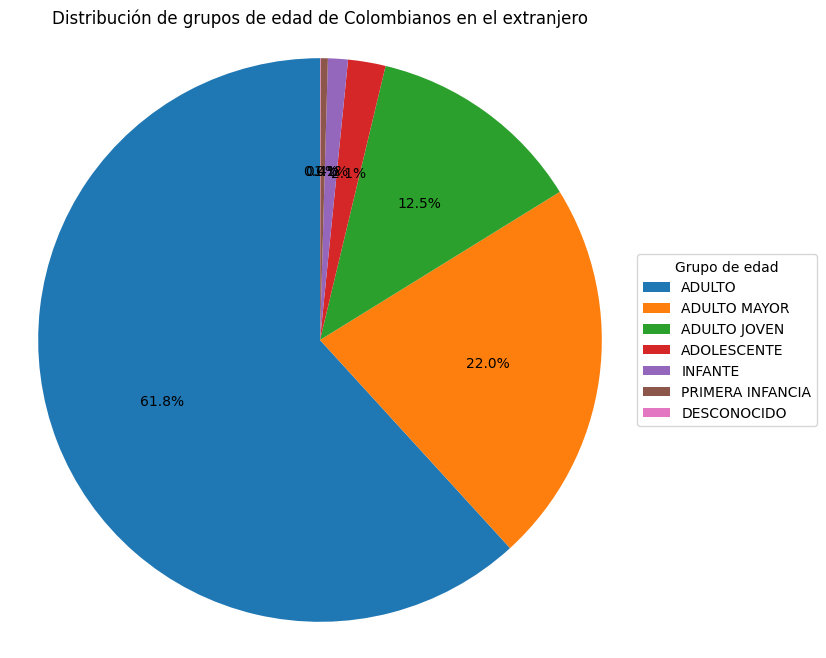

In [139]:
plt.figure(figsize=(8,8))
plt.pie(tablaPaises['Cantidad de personas'], labels=None, autopct='%1.1f%%', startangle=90)

plt.legend(
    tablaPaises['Grupo de edad'],
    title="Grupo de edad",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1) #posicion de la leyenda
)

plt.title('Distribución de grupos de edad de Colombianos en el extranjero')
plt.axis('equal')  # Asegurar aspecto circular
plt.show()
